In [1]:
setwd ("~/WGS/Sequences/Metrics/")

In [2]:
cov=read.table("Coverage_Pool2.txt")

In [3]:
colnames(cov)=c("Scaffold", "depth", "NumBp", "BpTotal", "Percent", "Sample")

In [4]:
cov$percentage=(as.numeric(as.character(cov$Percent)))*100

In [5]:
zero=cov[cov$depth==0,]

In [6]:
zero$Percentage=NULL
zero$Percent=NULL
zero$depth=NULL

In [7]:
require(plyr)

Loading required package: plyr


In [8]:
zero$NumBp=as.numeric(as.character(zero$NumBp))

In [9]:
zero$BpTotal=as.numeric(as.character(zero$BpTotal))

In [10]:
zerosum=ddply(zero, "Sample", numcolwise(sum))

In [11]:
zerosum$percentage=(1-(zerosum$NumBp/zerosum$BpTotal))*100

In [12]:
require(ggplot2)

Loading required package: ggplot2


In [13]:
plot=ggplot(data=zerosum, aes(x=Sample, y=percentage))+
  geom_bar(data=zerosum, stat="identity")+
  theme_bw()+ylab("Percent >= 1x coverage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

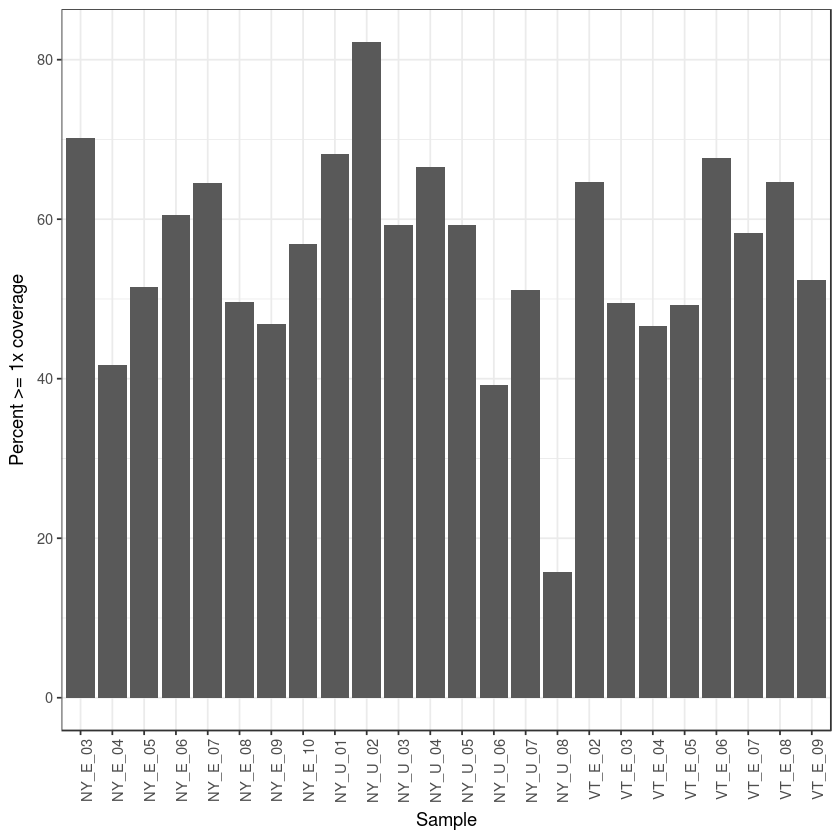

In [14]:
plot